In [1]:
#Las librerías utilizadas en este documento son:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

## Regresión lineal simple

#### Para el barrio Caballito de Capital Federal utilizando todos los tipos de propiedades

In [2]:
#leemos el df creado para el barrio de caballito
df = pd.read_csv('./data/data_limpio_gdf_caballito.csv')

### Vamos a comparar distintos Scores del Modelo utilizando distintos criterios. 

Vemos la correlacion entre la variable predictora y objetivo

Estadisticos de la correlación entre superficie y precio
Coeficiente de correlación de Pearson:  0.6395343361043391
----------------------------------------------------------


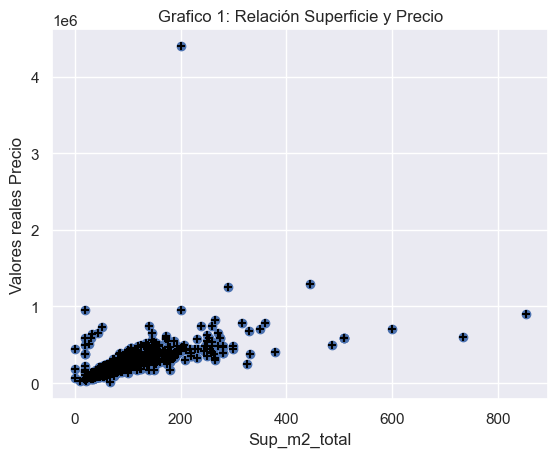

In [3]:
#representamos los datos de la variable predictora y objetivo para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.
X = df[['sup_m2_total']]
y = df['precio_usd']

# vemos la correlacion entre las variables
corr_test = pearsonr(x = df['sup_m2_total'], y =  df['precio_usd'])

#imprimimos el coeficiente de correlacion de pearson y su p value
print("Estadisticos de la correlación entre superficie y precio")
print("Coeficiente de correlación de Pearson: ", corr_test[0])

print("----------------------------------------------------------")
# Graficamos la variable X contra la variable Y, 
plt.scatter(X, y, s=30, c='black', marker='+', zorder=10)
plt.scatter(X, y)
plt.xlabel("Sup_m2_total")
plt.ylabel("Valores reales Precio")
plt.title('Grafico 1: Relación Superficie y Precio')
plt.show()


El gráfico y la correlación muestran una relación lineal, de intensidad considerable (r = 0.64) . Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el precio en dolares en función de la superficie.

Realizamos la regresion simple con los datos totales

Estadisticos del modelo sin divivir los datos
Intercepto =   66921.5670256661
b_sup_m2_total=   [1694.21606811]
R2=  0.40900416705641873
EMC: 15314660323.8501
r_EMC: 123752.41542632652


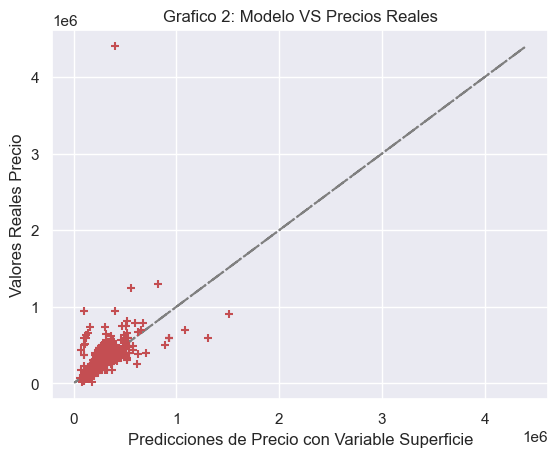

In [4]:
#generamos la regresión simple para el barrio caballito usando como variable predictora la superficie total
#sin realizar una division de los datos para ver como dan los resultados
X = df[['sup_m2_total']]
y = df['precio_usd']

# vemos la correlacion entre las variables
corr_test = pearsonr(x = df['sup_m2_total'], y =  df['precio_usd'])
# Importamos, Instanciamos, Fiteamos, etc..

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

print("Estadisticos del modelo sin divivir los datos")
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', ' ', model.intercept_)
print ('b_sup_m2_total=', ' ', model.coef_)
# imprimimos la métrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2=','', model.score(X, y))
print ("EMC:", mean_squared_error(y, predictions))
print ("r_EMC:", np.sqrt(mean_squared_error(y, predictions)))

# Graficamos el modelo re regresion del modelo con train_test_split
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Precio con Variable Superficie")
plt.ylabel("Valores Reales Precio")
plt.title('Grafico 2: Modelo VS Precios Reales')
plt.show()


#### Ahora dividimos en sets de training y testing

In [5]:
# #Realizamos el modelo de regresión utilizando train_test_split para los mismos datos 

# # Dividimos el dataset en train y test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train_1, y_train_1)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_1 = lr.predict(X)

Estadisticos del modelo con train_test_split
Intercepto=   55234.54481626907
b_sup_m2_total=   [1875.77315523]
R2_train=   0.39986727444304115
R2_test=   0.43447826023130054
EMC: 15438266078.254463
r_EMC: 124250.81922568746


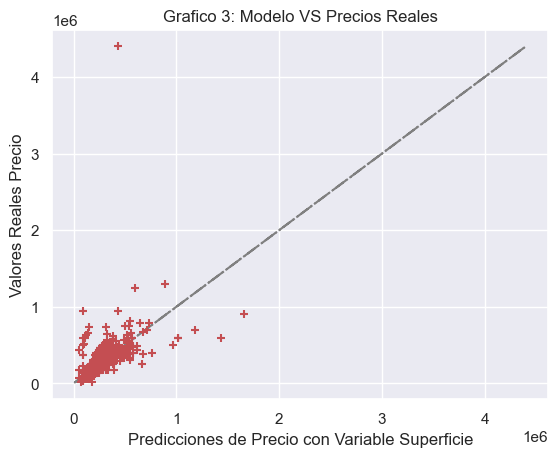

In [6]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print("Estadisticos del modelo con train_test_split")
print ('Intercepto=', ' ', lr.intercept_)
print ('b_sup_m2_total=', ' ', lr.coef_)
# imprimimos la métrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', lr.score(X_train_1, y_train_1))
print ('R2_test=', ' ', lr.score(X_test_1, y_test_1))
print ("EMC:", mean_squared_error(y, predictions_1))
print ("r_EMC:", np.sqrt(mean_squared_error(y, predictions_1)))

# Graficamos el modelo re regresion del modelo con train_test_split
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions_1, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Precio con Variable Superficie")
plt.ylabel("Valores Reales Precio")
plt.title('Grafico 3: Modelo VS Precios Reales')
plt.show()

Resumen de los parametros estadisticos determinados:

El valor promedio de precio cuando la superficie total es cero (intercepto) disminuye en el modelo con train-test-split: 
66921 usd al modelar todos los datos y 55234 usd al hacer la separacion de datos.
Al considerar una menor cantidad de datos que modelando a toda "población" es razonable.

El efecto promedio que tiene sobre precio usd el incremento en una unidad de superficie total aumenta en el modelo con separacion de datos: 1875 unidades al hacer la separacion de datos y aprox 1694 unid al modelar todos los datos

El R2 es la respuesta de que nuestra variable objetivo es explicada por el modelo, por lo que tenemos mejores resultados al testear con una menor cantidad de datos. 

    El R2 de entrenamiento disminuye de 0.41 a 0.39 al hacer la separacion de los datos en train_test_split. 

    El R2 para el test es de 0.43

El error (r_EMC) de test es de 124250. Las predicciones del modelo final se alejan en promedio 124250 unidades del valor real.

En resumen: 
Al separar los datos estamos tomando muestras sobre nuestra poblacion muestral en el cual la muestra evaluada puede dar considerablemente diferente. 

    Al realizar la prueba test se observa que el modelo es capaz de explicar el 43% de la variabilidad observada en la variable precio en usd.

### Separamos por tipo de inmueble
Realizamos un filtro en el tipo de inmueble para ver si existen cambios en el modelo: nos quedamos con departamentos que para el barrio caballito cuenta con mas de 1500 registros. Existe un motivo adicional, sospechamos que la superficie total no sea buen predictor para casas.

In [7]:
#Solo para departamentos
tipo_dept = ["apartment"]
df_deptos = df[df["tipo"].isin(tipo_dept)]

In [8]:
# Asignamos la variable a predecir
y_d = df_deptos['precio_usd']
# Asignamos la variable predictora
X_d = df_deptos[['sup_m2_total']]
# Dividimos el dataset en train y test

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

# Instanciamos el modelo y lo entrenamos

lr_d = linear_model.LinearRegression()
lr_d.fit(X_train_d, y_train_d)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_d = lr_d.predict(X_d)

In [9]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', lr_d.intercept_)
print ('sup_m2_total=', ' ', lr_d.coef_)

# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.

print ('R2_train=', ' ', lr_d.score(X_train_d, y_train_d))
print ('R2_test=', ' ', lr_d.score(X_test_d, y_test_d))
print ("EMC:", mean_squared_error(y_d, predictions_d))
print ("r_EMC:", np.sqrt(mean_squared_error(y_d, predictions_d)))

Intercepto=   18397.391173589247
sup_m2_total=   [2453.16272062]
R2_train=   0.7200498403967248
R2_test=   0.2278468863302393
EMC: 12778210281.139126
r_EMC: 113040.74611014882


Pareciera ser que utilizando sólo departamentos el modelo empeora un poco lo cuál llama la atención considerablemente. 
¿Puede ser que justo sea por cómo fue hecha la distribución de los datos?

In [10]:
# Realizamos la validación cruzada con 5 folds de la data con todos los tipos de propiedades.

scores = cross_val_score(model, X, y, cv=5)

# Imprimimos los scores de cada fold.

print ('Cross-validated scores:', scores)

# Imprimimos el promedio de los scores.

print ('Promedio de los scores:', scores.mean())

Cross-validated scores: [0.58241404 0.18250134 0.653711   0.69364038 0.68594075]
Promedio de los scores: 0.5596415029811654


In [11]:
# Realizamos la validación cruzada con 5 folds de la data con departamentos.

scores_d = cross_val_score(model, X_d, y_d, cv=5)

# Imprimimos los scores de cada fold.

print ('Cross-validated scores:', scores_d)

# Imprimimos el promedio de los scores.

print ('Promedio de los scores:', scores_d.mean())

Cross-validated scores: [0.74294519 0.22073121 0.79197124 0.77307498 0.82796429]
Promedio de los scores: 0.671337379850067


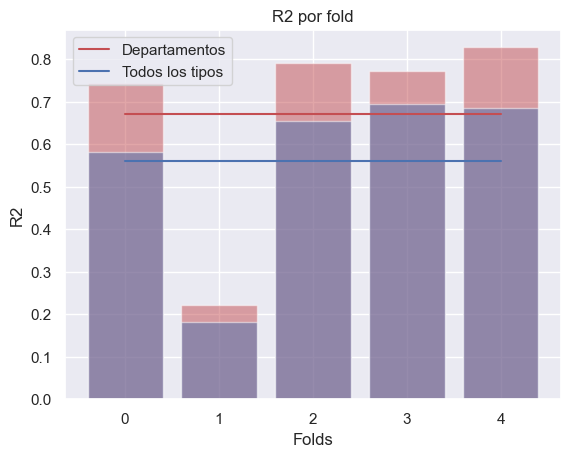

In [12]:
# Graficamos el promedio de los scores de cada tipo de propiedad.

plt.plot(range(5),scores_d.mean()*np.ones(5),c='r',label='Departamentos')
plt.plot(range(5),scores.mean()*np.ones(5), c='b',label='Todos los tipos')
plt.bar(range(5), scores_d, align='center', alpha=0.5, color='r')
plt.bar(range(5), scores, align='center', alpha=0.5, color='b')
plt.plot(scores_d.mean(), 'r')
plt.plot(scores.mean(), 'r')
plt.xlabel('Folds')
plt.ylabel('R2')
plt.title('R2 por fold')
plt.legend(['Departamentos', 'Todos los tipos'])
plt.show()


Con cross validation podemos confirmar que efectivamente el modelo mejora al utilizar sólo departamentos.

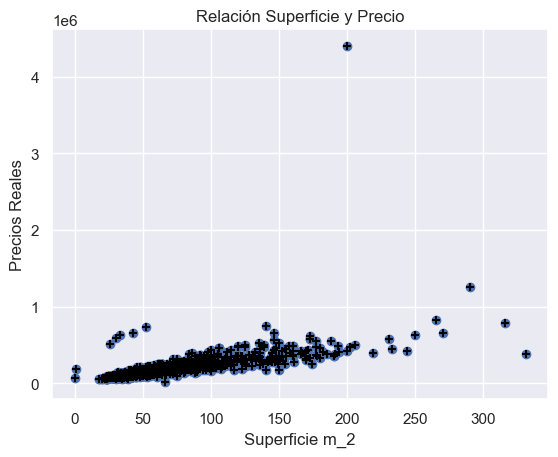

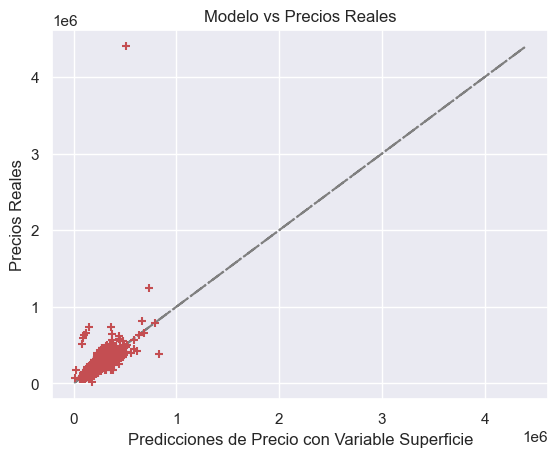

In [13]:
# Graficamos la variable X contra la variable Y
plt.scatter(X_d, y_d, s=30, c='black', marker='+', zorder=10)
plt.scatter(X_d, y_d)
plt.xlabel("Superficie m_2")
plt.ylabel("Precios Reales")
plt.title('Relación Superficie y Precio')
plt.show()

# Graficamos el modelo
plt.plot(y_d,y_d, '-.',c='grey')
plt.scatter(predictions_d, y_d, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Precio con Variable Superficie")
plt.ylabel("Precios Reales")
plt.title('Modelo vs Precios Reales')
plt.show()